In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r"D:\PREDICTIVE ANALYTICS\sentimentdataset.csv"

df = pd.read_csv(file_path)
df.info()
df.head()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       732 non-null    object
 1   Sentiment  732 non-null    object
 2   Timestamp  732 non-null    object
 3   User       732 non-null    object
 4   Platform   732 non-null    object
 5   Hashtags   732 non-null    object
 6   Retweets   732 non-null    int64 
 7   Likes      732 non-null    int64 
 8   Country    732 non-null    object
 9   Year       732 non-null    int64 
 10  Month      732 non-null    int64 
 11  Day        732 non-null    int64 
 12  Hour       732 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 74.5+ KB


Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [2]:
print(df.columns)

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


In [3]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%d-%m-%Y %H:%M")
df["Hashtag_Count"] = df["Hashtags"].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df["Engagement_Rate"] = df["Likes"] + df["Retweets"]
df.loc[df["Engagement_Rate"] <= 0.3, "Engagement_Category"] = "Low"
df.loc[(df["Engagement_Rate"] > 0.3) & (df["Engagement_Rate"] <= 0.7), "Engagement_Category"] = "Medium"
df.loc[df["Engagement_Rate"] > 0.7, "Engagement_Category"] = "High"
df["Sentiment"].fillna(df["Sentiment"].mode()[0], inplace=True)

In [4]:
label_encoder = LabelEncoder()
df["Sentiment_Encoded"] = label_encoder.fit_transform(df["Sentiment"])
df["Platform_Encoded"] = label_encoder.fit_transform(df["Platform"])
scaler = MinMaxScaler()
df[["Likes", "Retweets", "Engagement_Rate"]] = scaler.fit_transform(df[["Likes", "Retweets", "Engagement_Rate"]])

<Figure size 1200x600 with 0 Axes>

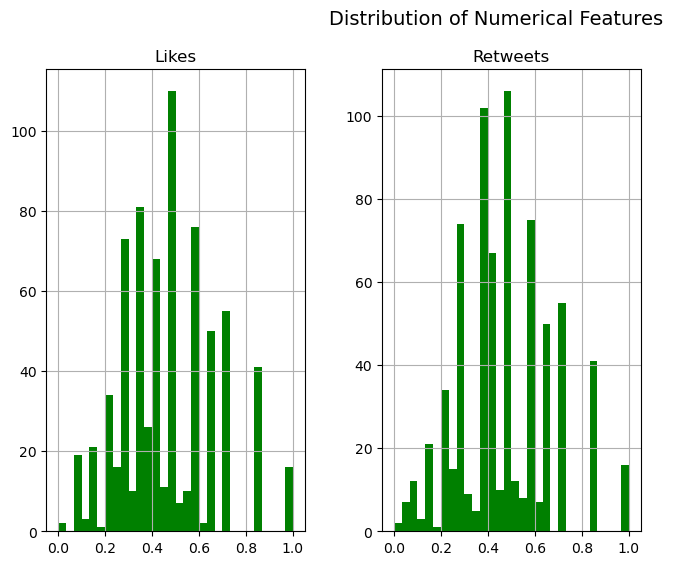

In [5]:
plt.figure(figsize=(12, 6))

df[['Likes', 'Retweets']].hist(
    bins=30, 
    figsize=(12, 6), 
    layout=(1, 3), 
    color='GREEN'  
)

plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

E:\DOWNLOADS APP\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


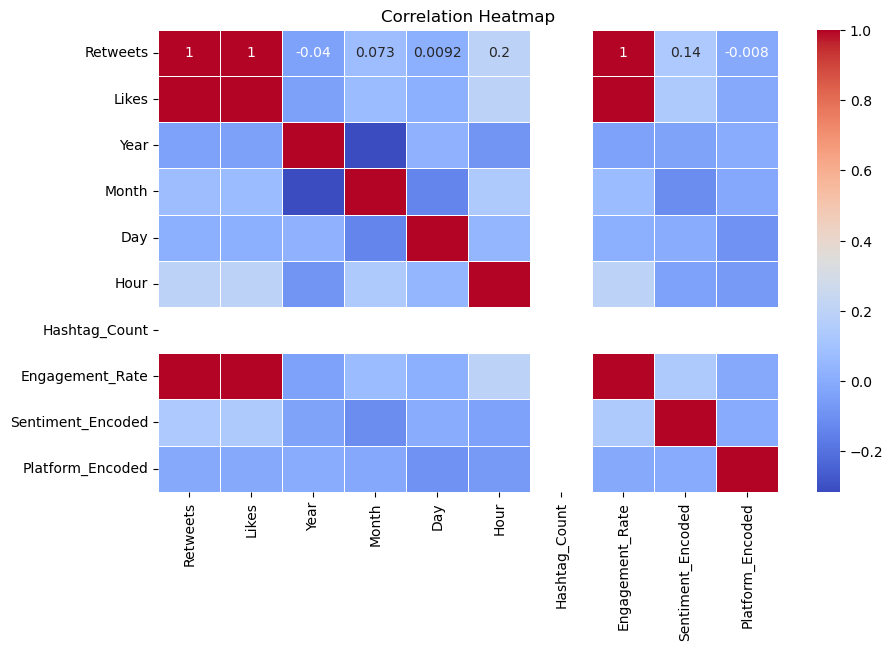

In [6]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")

plt.show()

Text(0.5, 1.0, 'Boxplot for Outlier Detection')

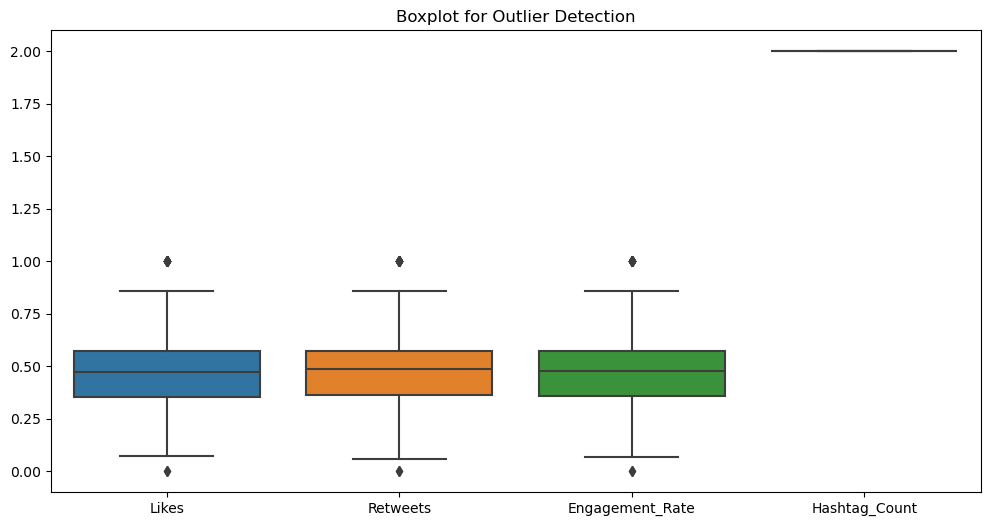

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Likes', 'Retweets', 'Engagement_Rate','Hashtag_Count']])
plt.title("Boxplot for Outlier Detection")

Text(0.5, 1.0, 'Sentiment Distribution')

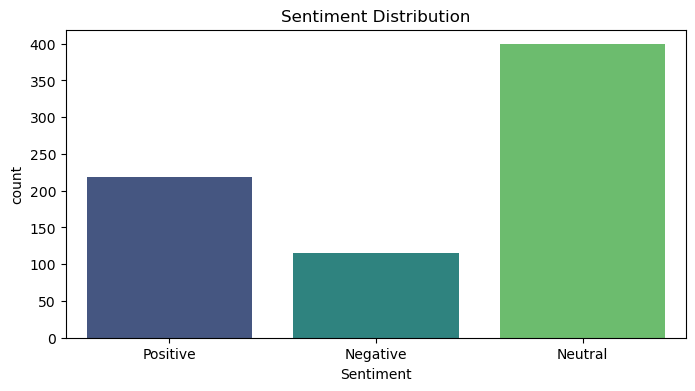

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["Sentiment"], palette="viridis")
plt.title("Sentiment Distribution")

Text(0.5, 1.0, 'Platform Distribution')

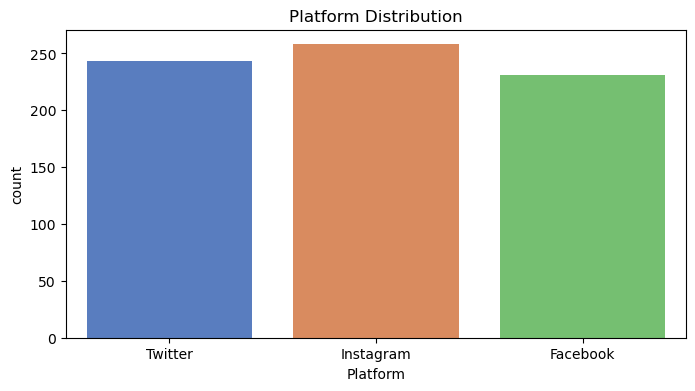

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["Platform"], palette="muted")
plt.title("Platform Distribution")

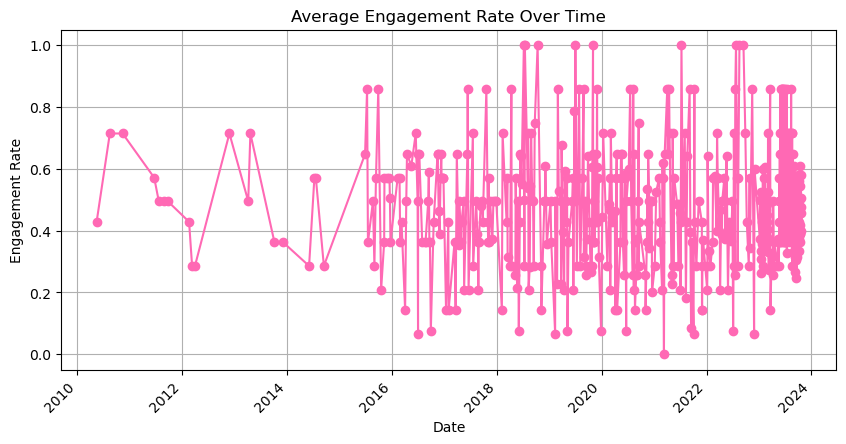

In [10]:
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])
plt.figure(figsize=(10, 5))
df.groupby("Date")["Engagement_Rate"].mean().plot(marker="o", linestyle="-", color="hotpink")
plt.title("Average Engagement Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

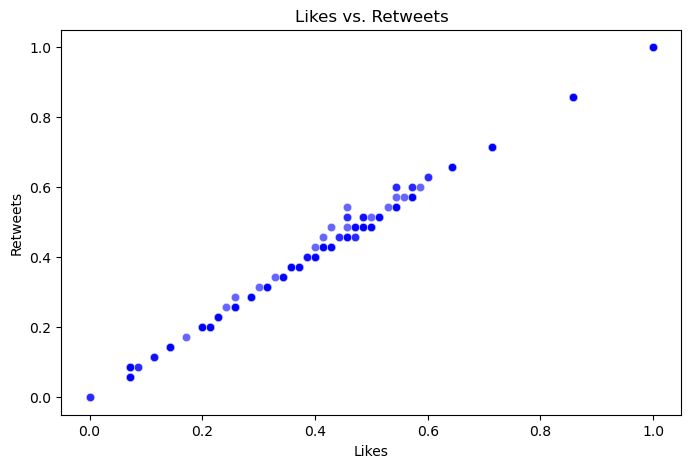

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Likes"], y=df["Retweets"], alpha=0.6, color="blue")
plt.title("Likes vs. Retweets")
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.show()

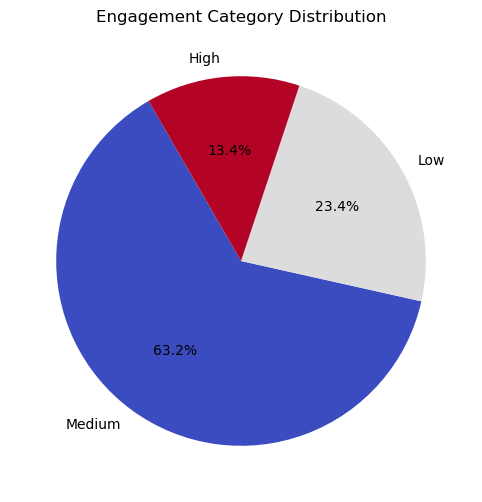

In [12]:
df["Engagement_Category"] = pd.cut(df["Engagement_Rate"], bins=[0, 0.3, 0.7, 1], labels=["Low", "Medium", "High"])
plt.figure(figsize=(8, 6))
df["Engagement_Category"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm", startangle=120)
plt.title("Engagement Category Distribution")
plt.ylabel("")
plt.show()

E:\DOWNLOADS APP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\DOWNLOADS APP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\DOWNLOADS APP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


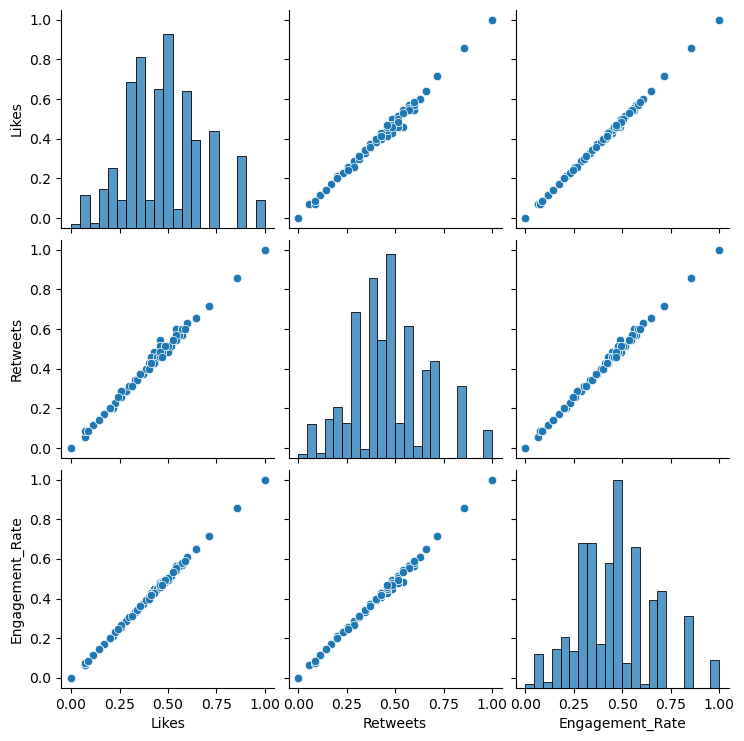

In [13]:
import seaborn as sns
sns.pairplot(df[["Likes", "Retweets", "Engagement_Rate"]])

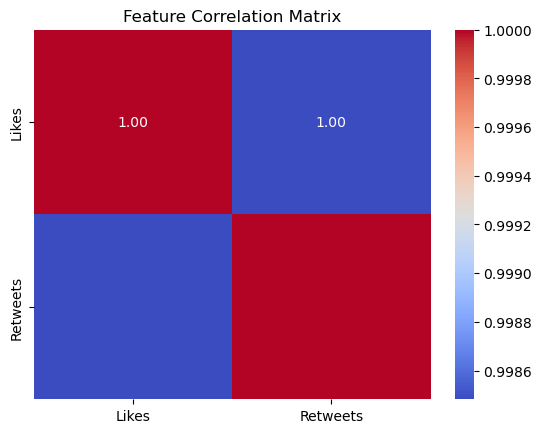

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
num_features = ["Likes", "Retweets"]
# Compute correlation matrix
corr_matrix = df[num_features].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
num_features = ["Likes", "Retweets", "Engagement_Rate", "Hashtag_Count"]
# Standardize the data (PCA works best with standard scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])
# Apply PCA
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(df_scaled)
# Convert to DataFrame
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df = pd.concat([df, df_pca], axis=1)
# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
if explained_variance[1] < 0.01:  # If PC2 explains <1% variance
    print("PCA is NOT useful because almost all variance is captured by the first principal component.")
else:
    print("PCA is useful as multiple components contribute significantly to variance.")

Explained Variance Ratio: [9.99475410e-01 5.24589751e-04]
PCA is NOT useful because almost all variance is captured by the first principal component.


In [16]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
fa_result = fa.fit_transform(df_scaled)

# Convert to DataFrame
df_fa = pd.DataFrame(fa_result, columns=["Factor1", "Factor2"])
df = pd.concat([df, df_fa], axis=1)

In [17]:
# Handle outliers with IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers_iqr(df, ["Likes", "Retweets", "Engagement_Rate", "Hashtag_Count"])

In [18]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns for clustering (keep only features)
# Drop non-numeric and unnecessary columns
X = df.drop(columns=[
    "Text", "User", "Platform", "Hashtags", "Country", "Engagement_Category",
    "Timestamp", "Date", "Sentiment"
])

# Optional: Keep only numerical columns just to be safe
X_numeric = X.select_dtypes(include=["float64", "int64"])

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from imblearn.combine import SMOTETomek
# Drop rows where target variable is NaN
df = df.dropna(subset=["Sentiment_Encoded"])

# Define X and y again
X = df.drop(["Sentiment", "Sentiment_Encoded", "Text", "Timestamp", "User", "Platform", 
             "Hashtags", "Country", "Engagement_Category", "Date"], axis=1)

y = df["Sentiment_Encoded"]

# Scale the features
from sklearn.preprocessing import StandardScaler
# Now you can split safely
from sklearn.model_selection import train_test_split
# Assuming X and y are already defined
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


In [20]:
import numpy as np
from sklearn.impute import SimpleImputer

# Use imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_imputed, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5454545454545454

Confusion Matrix:
 [[ 2 18  3]
 [ 1 68  9]
 [ 0 34  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.09      0.15        23
           1       0.57      0.87      0.69        78
           2       0.40      0.19      0.26        42

    accuracy                           0.55       143
   macro avg       0.54      0.38      0.37       143
weighted avg       0.53      0.55      0.48       143



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6293706293706294

Confusion Matrix:
 [[ 8 11  4]
 [ 6 64  8]
 [ 1 23 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.35      0.42        23
           1       0.65      0.82      0.73        78
           2       0.60      0.43      0.50        42

    accuracy                           0.63       143
   macro avg       0.60      0.53      0.55       143
weighted avg       0.62      0.63      0.61       143



In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train with Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_res, y_res)


RandomForestClassifier(max_depth=10, random_state=42)

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate with best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.6293706293706294


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Confusion Matrix:
 [[ 7 14  2]
 [ 1 69  8]
 [ 0 28 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.30      0.45        23
           1       0.62      0.88      0.73        78
           2       0.58      0.33      0.42        42

    accuracy                           0.63       143
   macro avg       0.69      0.51      0.54       143
weighted avg       0.65      0.63      0.60       143



In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [29]:
# Use the best parameters from tuning
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train on SMOTE-resampled data
best_rf.fit(X_res, y_res)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [30]:
# Predict on original test set
y_pred_smote = best_rf.predict(X_test)

# Evaluation
print("SMOTE + Random Forest Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))


SMOTE + Random Forest Accuracy: 0.6013986013986014

Confusion Matrix:
 [[ 9  7  7]
 [ 6 56 16]
 [ 2 19 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.39      0.45        23
           1       0.68      0.72      0.70        78
           2       0.48      0.50      0.49        42

    accuracy                           0.60       143
   macro avg       0.56      0.54      0.55       143
weighted avg       0.60      0.60      0.60       143



In [31]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(confusion_matrix(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

SVM Accuracy: 0.5874125874125874
[[ 3 17  3]
 [ 2 71  5]
 [ 0 32 10]]
              precision    recall  f1-score   support

           0       0.60      0.13      0.21        23
           1       0.59      0.91      0.72        78
           2       0.56      0.24      0.33        42

    accuracy                           0.59       143
   macro avg       0.58      0.43      0.42       143
weighted avg       0.58      0.59      0.52       143



In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc_model.fit(X_train, y_train)
gbc_preds = gbc_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gbc_preds))
print(confusion_matrix(y_test, gbc_preds))
print(classification_report(y_test, gbc_preds))


Gradient Boosting Accuracy: 0.5804195804195804
[[ 5 13  5]
 [ 6 61 11]
 [ 2 23 17]]
              precision    recall  f1-score   support

           0       0.38      0.22      0.28        23
           1       0.63      0.78      0.70        78
           2       0.52      0.40      0.45        42

    accuracy                           0.58       143
   macro avg       0.51      0.47      0.48       143
weighted avg       0.56      0.58      0.56       143



In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))


XGBoost Accuracy: 0.6083916083916084
[[ 4 14  5]
 [ 3 67  8]
 [ 0 26 16]]
              precision    recall  f1-score   support

           0       0.57      0.17      0.27        23
           1       0.63      0.86      0.72        78
           2       0.55      0.38      0.45        42

    accuracy                           0.61       143
   macro avg       0.58      0.47      0.48       143
weighted avg       0.60      0.61      0.57       143



In [34]:
# Step 1: Import necessary libraries for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Step 3: Train the LDA model
lda.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred_lda = lda.predict(X_test)

# Step 5: Evaluate the LDA model
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

# Confusion Matrix for LDA
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))

# Classification Report for LDA
print("\nClassification Report:\n", classification_report(y_test, y_pred_lda))


LDA Accuracy: 0.5384615384615384

Confusion Matrix:
 [[ 1 18  4]
 [ 1 68  9]
 [ 0 34  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.04      0.08        23
           1       0.57      0.87      0.69        78
           2       0.38      0.19      0.25        42

    accuracy                           0.54       143
   macro avg       0.48      0.37      0.34       143
weighted avg       0.50      0.54      0.46       143



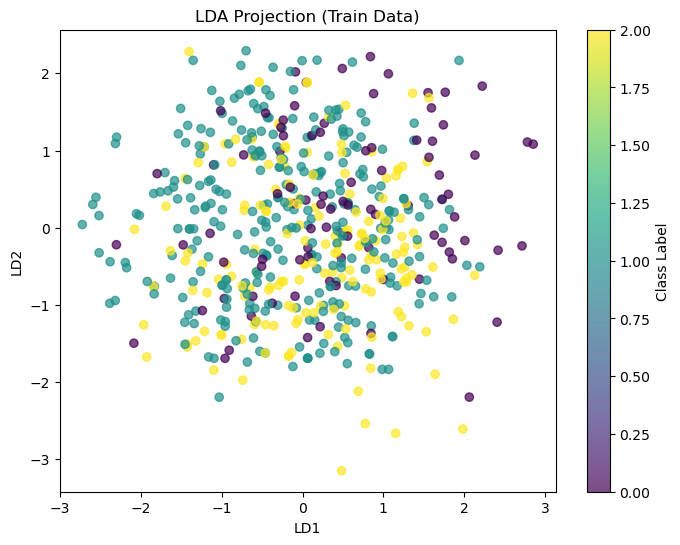

In [35]:
lda_2d = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda_2d.fit_transform(X_train, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('LDA Projection (Train Data)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.colorbar(label='Class Label')
plt.show()


In [36]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))


QDA Accuracy: 0.5314685314685315


E:\DOWNLOADS APP\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# 1) Define X and y from the SAME DataFrame
X = df.drop(columns=[
    "Sentiment", "Sentiment_Encoded", "Text", "Timestamp", "User",
    "Platform", "Hashtags", "Country", "Engagement_Category", "Date"
])
y = df["Sentiment_Encoded"]

# 2) Scale X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Do one single train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4) Build your pipeline and grid search
pipeline = Pipeline([
    ('feature_selection', SelectKBest(k='all')),  
    ('model',   QuadraticDiscriminantAnalysis())
])
grid_search = GridSearchCV(pipeline, {'model': [QuadraticDiscriminantAnalysis()]})

# 5) Fit with matching shapes
print("X_train_raw rows:", X_train_raw.shape[0])
print("   y_train rows:", len(y_train))
# They should both be the same number here.

grid_search.fit(X_train_raw, y_train)

X_train_raw rows: 571
   y_train rows: 571


E:\DOWNLOADS APP\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
E:\DOWNLOADS APP\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
E:\DOWNLOADS APP\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
E:\DOWNLOADS APP\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
E:\DOWNLOADS APP\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
E:\DOWNLOADS APP\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are col

GridSearchCV(estimator=Pipeline(steps=[('feature_selection',
                                        SelectKBest(k='all')),
                                       ('model',
                                        QuadraticDiscriminantAnalysis())]),
             param_grid={'model': [QuadraticDiscriminantAnalysis()]})

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [39]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
X = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Drop the target column 'Sentiment_Encoded'
X = X.drop(columns=['Sentiment_Encoded'])

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



E:\DOWNLOADS APP\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\DOWNLOADS APP\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
E:\DOWNLOADS APP\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\DOWNLOADS APP\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
 

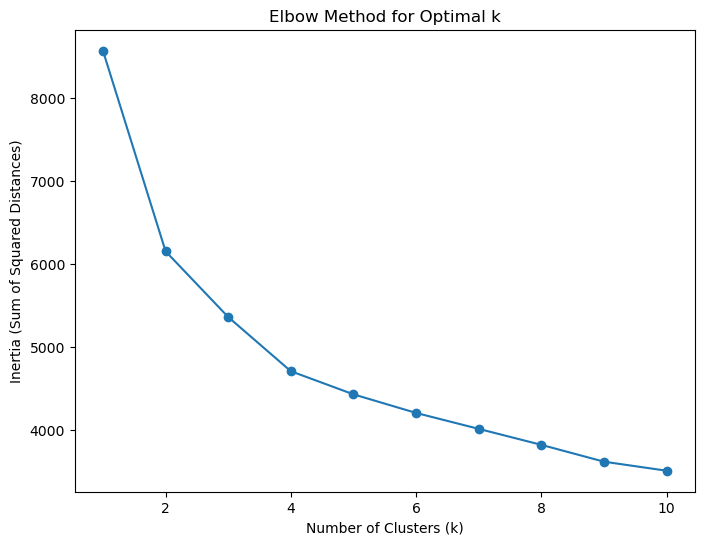

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)  # Try k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering

# Re-run Agglomerative Clustering (if needed)
agg = AgglomerativeClustering(n_clusters=3)  
agg_labels = agg.fit_predict(X_scaled) 

# Store labels in your original DataFrame
df['Agglomerative_Cluster'] = agg_labels


In [42]:
# Fit KMeans with the optimal number of clusters (let's assume k=3 for example)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

# Inspect the first few rows of the dataframe with cluster labels
print(df.head())


E:\DOWNLOADS APP\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\DOWNLOADS APP\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


                                                Text Sentiment  \
0   Enjoying a beautiful day at the park!        ...  Positive   
2   Just finished an amazing workout! 💪          ...  Positive   
3   Excited about the upcoming weekend getaway!  ...  Positive   
4   Trying out a new recipe for dinner tonight.  ...   Neutral   
5   Feeling grateful for the little things in lif...  Positive   

            Timestamp            User   Platform  \
0 2023-01-15 12:30:00   User123          Twitter   
2 2023-01-15 15:45:00   FitnessFan     Instagram   
3 2023-01-15 18:20:00   AdventureX      Facebook   
4 2023-01-15 19:55:00   ChefCook       Instagram   
5 2023-01-16 09:10:00   GratitudeNow     Twitter   

                                     Hashtags  Retweets     Likes  \
0   #Nature #Park                              0.285714  0.285714   
2   #Fitness #Workout                          0.428571  0.428571   
3   #Travel #Adventure                         0.085714  0.071429   
4   #Cooking #

In [43]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.18076886873291076


In [44]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scale the features again if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different eps and min_samples values
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add to DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Check how many clusters were found
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0     233
-1     143
 4      75
 3      64
 2      48
 6      31
 20     31
 8      19
 13      7
 1       6
 16      6
 5       5
 7       4
 23      4
 22      4
 14      4
 17      3
 21      3
 19      3
 11      3
 18      3
 12      3
 15      3
 10      3
 9       3
 24      3
Name: count, dtype: int64


In [45]:
from sklearn.metrics import silhouette_score

# Mask for valid clusters (not noise)
valid_mask = df['DBSCAN_Cluster'] != -1

# Ensure there are at least 2 valid clusters
if df['DBSCAN_Cluster'][valid_mask].nunique() > 1:
    dbscan_silhouette = silhouette_score(X_scaled[valid_mask], df['DBSCAN_Cluster'][valid_mask])
    print("Silhouette Score (DBSCAN, excluding outliers):", dbscan_silhouette)
else:
    print("Not enough valid clusters for silhouette score.")

Silhouette Score (DBSCAN, excluding outliers): -0.011586448106909479


In [46]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Initialize Agglomerative Clustering model
agg_clust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model and assign clusters to the DataFrame
df['Agglomerative_Cluster'] = agg_clust.fit_predict(X_scaled)

# Evaluate the clustering using silhouette score
agg_clust_silhouette_score = silhouette_score(X_scaled, df['Agglomerative_Cluster'])
print("Agglomerative Clustering Silhouette Score:", agg_clust_silhouette_score)

# View the first few rows to see the clusters assigned
print(df[['Text', 'Agglomerative_Cluster']].head())

Agglomerative Clustering Silhouette Score: 0.17377846042232883
                                                Text  Agglomerative_Cluster
0   Enjoying a beautiful day at the park!        ...                      0
2   Just finished an amazing workout! 💪          ...                      0
3   Excited about the upcoming weekend getaway!  ...                      0
4   Trying out a new recipe for dinner tonight.  ...                      0
5   Feeling grateful for the little things in lif...                      1


E:\DOWNLOADS APP\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [47]:
# Try with different number of clusters, for example, 4 clusters
agg_clust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df['Agglomerative_Cluster'] = agg_clust.fit_predict(X_scaled)

# Recalculate the silhouette score
agg_clust_silhouette_score = silhouette_score(X_scaled, df['Agglomerative_Cluster'])
print("Updated Agglomerative Clustering Silhouette Score:", agg_clust_silhouette_score)

Updated Agglomerative Clustering Silhouette Score: 0.1702193553811407


E:\DOWNLOADS APP\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [48]:
agg_clust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df['Agglomerative_Cluster'] = agg_clust.fit_predict(X_scaled)
agg_clust_silhouette_score = silhouette_score(X_scaled, df['Agglomerative_Cluster'])
print("Agglomerative Clustering Silhouette Score with 5 clusters:", agg_clust_silhouette_score)

Agglomerative Clustering Silhouette Score with 5 clusters: 0.14575279906903466


E:\DOWNLOADS APP\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

agg_clust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Agglomerative_Cluster'] = agg_clust.fit_predict(X_pca)

# Recalculate silhouette score
agg_clust_silhouette_score = silhouette_score(X_pca, df['Agglomerative_Cluster'])
print("Agglomerative Clustering Silhouette Score after PCA:", agg_clust_silhouette_score)


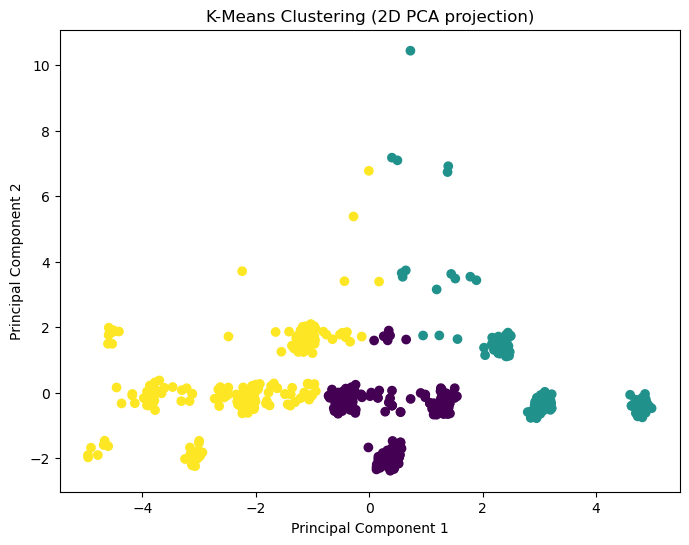

In [49]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("K-Means Clustering (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['Text'])

# Group by cluster
for i in sorted(df['Agglomerative_Cluster'].unique()):
    cluster_texts = df[df['Agglomerative_Cluster'] == i]['Text']
    tfidf = TfidfVectorizer(max_features=20, stop_words='english')
    X_cluster = tfidf.fit_transform(cluster_texts)
    print(f"\nCluster {i} Top Terms:")
    print(tfidf.get_feature_names_out())


Cluster 0 Top Terms:
['beauty' 'concert' 'dance' 'dreams' 'echoes' 'garden' 'heart' 'journey'
 'joy' 'laughter' 'life' 'like' 'love' 'moment' 'nature' 'new' 'personal'
 'soul' 'surprise' 'whispers']

Cluster 1 Top Terms:
['art' 'challenges' 'creating' 'creativity' 'day' 'dreams' 'empathy'
 'feeling' 'garden' 'heart' 'hopeful' 'life' 'loneliness' 'lost' 'new'
 'optimism' 'seeds' 'shattered' 'sky' 'world']

Cluster 2 Top Terms:
['ancient' 'compassion' 'dance' 'day' 'evening' 'event' 'exploring'
 'feeling' 'friends' 'joined' 'level' 'like' 'local' 'missing' 'music'
 'new' 'project' 'reverence' 'science' 'time']

Cluster 3 Top Terms:
['acceptance' 'ambivalence' 'day' 'embracing' 'emotions' 'fingers'
 'indifference' 'life' 'like' 'new' 'nostalgia' 'numbness' 'old'
 'painting' 'resentment' 'shield' 'thoughts' 'threads' 'uncertainty'
 'world']

Cluster 4 Top Terms:
['art' 'awe' 'capturing' 'challenging' 'cherished' 'club' 'completing'
 'exploring' 'feeling' 'fulfillment' 'journey' 'laughter'

21:43:34 - cmdstanpy - INFO - Chain [1] start processing
21:43:35 - cmdstanpy - INFO - Chain [1] done processing


Enter sentiment (Positive / Neutral / Negative):  neutral



Generating forecast with sentiment = 0 (Neutral)


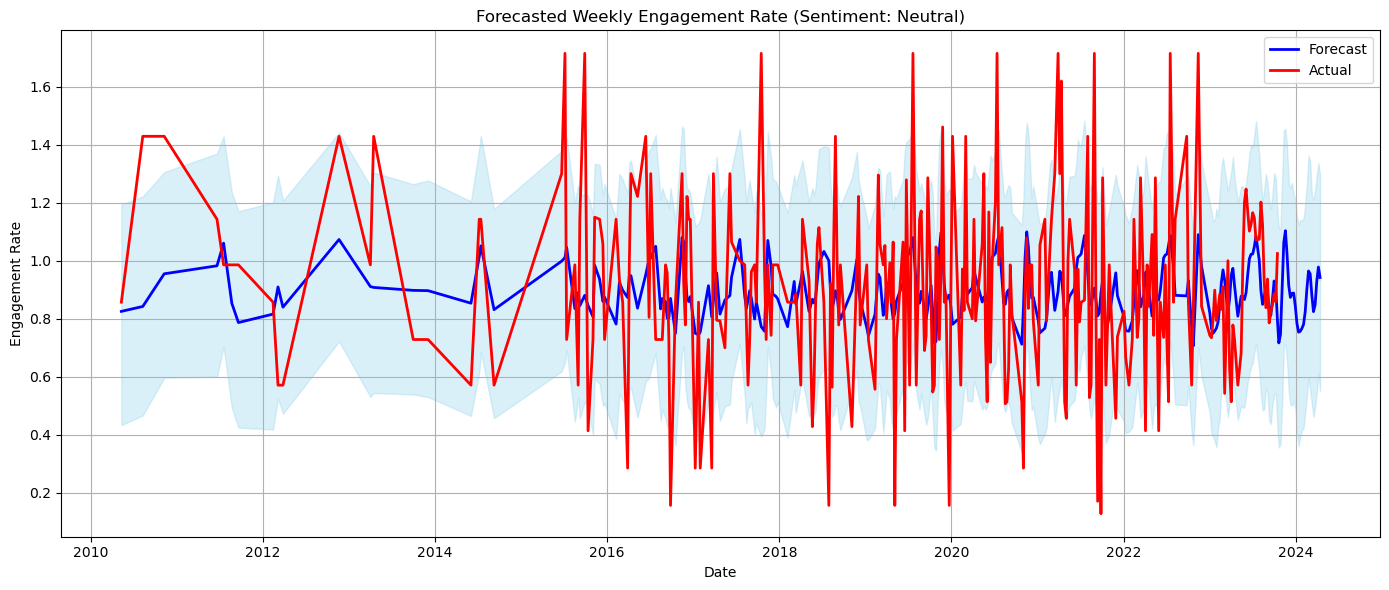

In [51]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -------------------------
# 1. Data Preparation
# -------------------------
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Date'] = pd.to_datetime(df['Date'])

# Encode Sentiment
df['Sentiment'] = df['Sentiment'].fillna(df['Sentiment'].mode()[0])
sentiment_map = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['Sentiment_Encoded'] = df['Sentiment'].map(sentiment_map)

# Engagement Rate
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').fillna(0)
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce').fillna(0)
df['Engagement_Rate'] = df['Likes'] + df['Retweets']
df['Engagement_Rate'] = df['Engagement_Rate'].clip(upper=df['Engagement_Rate'].quantile(0.99))

# Weekly Aggregation
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_df = df.groupby('Week').agg({
    'Engagement_Rate': 'mean',
    'Sentiment_Encoded': 'mean'
}).reset_index()

weekly_df.columns = ['ds', 'y', 'sentiment']

# -------------------------
# 2. Train Prophet Model
# -------------------------
model = Prophet(seasonality_mode='additive')

model.add_regressor('sentiment')
model.fit(weekly_df)

# -------------------------
# 3. Get Input from User
# -------------------------
user_input = input("Enter sentiment (Positive / Neutral / Negative): ").strip().capitalize()

while user_input not in ['Positive', 'Neutral', 'Negative']:
    user_input = input("Invalid input. Please enter 'Positive', 'Neutral', or 'Negative': ").strip().capitalize()

user_sentiment = sentiment_map[user_input]
print(f"\nGenerating forecast with sentiment = {user_sentiment} ({user_input})")

# -------------------------
# 4. Forecast Future
# -------------------------
future = model.make_future_dataframe(periods=26, freq='W')
future['sentiment'] = user_sentiment 

forecast = model.predict(future)

# -------------------------
# 5. Plot the Forecast
# -------------------------
plt.figure(figsize=(14, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue', linewidth=2)
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='skyblue', alpha=0.3)
plt.plot(weekly_df['ds'], weekly_df['y'], label='Actual', color='red', linewidth=2)
plt.title(f"Forecasted Weekly Engagement Rate (Sentiment: {user_input})")
plt.xlabel("Date")
plt.ylabel("Engagement Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
from scipy.stats import wilcoxon, mannwhitneyu
import numpy as np

# -------------------------
# 6. Prepare Actual and Forecasted Data for Testing
# -------------------------

# Merge only where actuals are available (i.e., before forecasting future periods)
merged = pd.merge(weekly_df[['ds', 'y']], forecast[['ds', 'yhat']], on='ds', how='inner')

actual = merged['y']
forecasted = merged['yhat']

# -------------------------
# 7. Wilcoxon Signed-Rank Test (Paired Test)
# -------------------------
print("\n Wilcoxon Signed-Rank Test Results:")
try:
    stat_wilcoxon, p_value_wilcoxon = wilcoxon(actual, forecasted)
    print(f"Test Statistic = {stat_wilcoxon:.4f}")
    print(f"P-Value = {p_value_wilcoxon:.4f}")
except ValueError as e:
    print(f"Error during Wilcoxon test: {e}")

# Interpretation
alpha = 0.05
if p_value_wilcoxon < alpha:
    print(" Reject the null hypothesis: Significant difference between actual and forecasted values.")
else:
    print(" Fail to reject the null hypothesis: No significant difference between actual and forecasted values.")

# -------------------------
# 8. Mann-Whitney U Test (Independent Samples Test)
# -------------------------
print("\n Mann-Whitney U Test Results:")
try:
    stat_mannwhitney, p_value_mannwhitney = mannwhitneyu(actual, forecasted, alternative='two-sided')
    print(f"Test Statistic = {stat_mannwhitney:.4f}")
    print(f"P-Value = {p_value_mannwhitney:.4f}")
except ValueError as e:
    print(f"Error during Mann-Whitney U test: {e}")

# Interpretation
if p_value_mannwhitney < alpha:
    print(" Reject the null hypothesis: Significant difference in distributions between actual and forecasted values.")
else:
    print(" Fail to reject the null hypothesis: No significant difference in distributions between actual and forecasted values.")



 Wilcoxon Signed-Rank Test Results:
Test Statistic = 18694.0000
P-Value = 0.6037
 Fail to reject the null hypothesis: No significant difference between actual and forecasted values.

 Mann-Whitney U Test Results:
Test Statistic = 38809.0000
P-Value = 0.9299
 Fail to reject the null hypothesis: No significant difference in distributions between actual and forecasted values.
